# Examen 3
## Física Computacional
### Hernández Ramos Sandra 
$Sandii\hbar ers^{\heartsuit}$ 🦆🌵🌹🥀🌿🍀🌺🌷



## Julia

In [175]:
using Plots
using LaTeXStrings
using PyPlot

Resuelva los siguientes ejercicios,explicando claramente su razonamiento.


<span style="color:blue">1. Ecuentra la solución númerica para la ecuación diferencial $\nabla^{2}\phi=0$ en dos dimensiones con condiciones a la frontera $\phi(0,y)=\phi(x,0)=\phi(1,y)=\phi(x,1)0$ y  $\phi=1$ para todos los puntos x,y en dos círculos de radio $1/4$ con centros en (0.4,0.5) y (0.6,0.5) (3 puntos)<span>
    

Tal como se hizo en el Notebook 14 comenzamos programando la forma de generar la malla numérica tomando en cuenta los condiciones de las fronteras.

In [93]:
function Malla_eje1(x,y,r,V_0=1.0)
    Mat=zeros(length(x),length(y))
    for i in 2:length(y)-1 #columnas
        for j in 2:length(x)-1 #renglones
            #Condiciones a la frontera
            #dos círculos
            if sqrt((x[j]-0.4)^2+(y[i]-0.5)^2 )<=r || sqrt((x[j]-0.6)^2+(y[i]-0.5)^2 )<=r
                Mat[i,j]=V_0
            else
                Mat[i,j] = rand()
            end
        end
    end
    return Mat
end

Malla_eje1 (generic function with 2 methods)

In [94]:
x=collect(0.0:0.01:1.0)
y=collect(0.0:0.01:1.0)
mi_malla=Malla_eje1(x,y,0.25) #1/4 de radio

101×101 Array{Float64,2}:
 0.0  0.0        0.0        0.0        …  0.0        0.0        0.0
 0.0  0.635715   0.557409   0.162955      0.8468     0.640082   0.0
 0.0  0.15585    0.462645   0.24903       0.504342   0.947961   0.0
 0.0  0.75041    0.612924   0.0325534     0.0446473  0.628739   0.0
 0.0  0.167262   0.202149   0.866731      0.326501   0.390802   0.0
 0.0  0.83877    0.960001   0.851864   …  0.203641   0.707574   0.0
 0.0  0.210098   0.637029   0.147076      0.82428    0.816222   0.0
 0.0  0.994189   0.061271   0.935575      0.160526   0.534676   0.0
 0.0  0.625491   0.862863   0.17067       0.677039   0.559383   0.0
 0.0  0.537348   0.0309362  0.682812      0.235436   0.5368     0.0
 0.0  0.564476   0.0505877  0.631972   …  0.735505   0.489145   0.0
 0.0  0.931259   0.512482   0.774582      0.670919   0.903088   0.0
 0.0  0.698027   0.112742   0.043025      0.883532   0.0878965  0.0
 ⋮                                     ⋱                        ⋮  
 0.0  0.810768   0.414

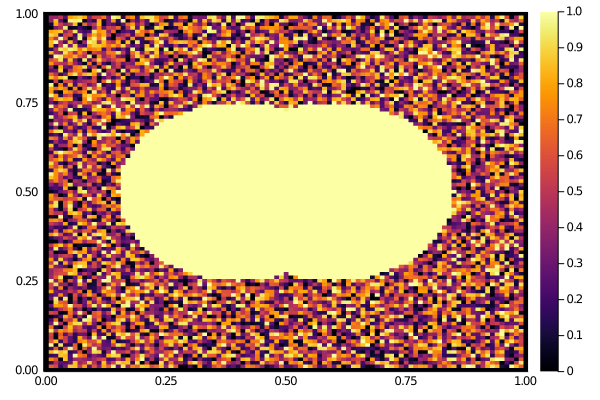

In [95]:
heatmap(x,y,mi_malla)

Ahora usamos el método de Jacobi definido como:
$$\phi_{i,j}=\frac{1}{4}\left(\phi_{i+1,j}+\phi_{i-1,j}+\phi_{i,j+1}-2\phi_{i,j}+\phi_{i,j-1}\right)$$

In [96]:
function relax!(Mat,V_0=1.)
    for i in 2:length(y)-1 # columnas 
        for j in 2:length(x)-1 # renglones
            if Mat[i,j] ≠ V_0
                Mat[i,j] = 0.25*( Mat[i+1,j] + Mat[i-1,j] + Mat[i,j+1] + Mat[i,j-1] )
            end
        end
    end
    return Mat
end

relax! (generic function with 2 methods)

In [97]:
mi_malla2=relax!(mi_malla)

101×101 Array{Float64,2}:
 0.0  0.0       0.0       0.0       …  0.0       0.0       0.0       0.0
 0.0  0.178315  0.200979  0.194913     0.305853  0.362569  0.327632  0.0
 0.0  0.347843  0.352694  0.206248     0.367616  0.430698  0.346768  0.0
 0.0  0.282007  0.217351  0.53785      0.198369  0.396077  0.283412  0.0
 0.0  0.330732  0.593704  0.706992     0.223481  0.3035    0.323622  0.0
 0.0  0.375208  0.614451  0.594409  …  0.196432  0.507947  0.411948  0.0
 0.0  0.501606  0.331101  0.614346     0.462819  0.486878  0.358376  0.0
 0.0  0.297092  0.606658  0.383089     0.519563  0.554539  0.368075  0.0
 0.0  0.424326  0.308147  0.481493     0.634503  0.495965  0.35021   0.0
 0.0  0.254934  0.32412   0.491305     0.462444  0.557679  0.349258  0.0
 0.0  0.309195  0.444443  0.490758  …  0.682959  0.600175  0.463131  0.0
 0.0  0.379926  0.427923  0.413384     0.630801  0.754399  0.326357  0.0
 0.0  0.204391  0.417423  0.4617       0.571777  0.422746  0.334249  0.0
 ⋮                       

Ahora implementamos el método anterior hasta alcanzar convergencia en el método numérico. Para ello definimos una nueva función; repitiendo la función ***relax!*** hasta que se alcance la convergencia.

In [98]:
function metodo_relax_v1!(Mat,error=1e-5)
    testigo,cuenta = true,0
    while testigo == true
        Mat_old = copy(Mat)
        Mat = relax!(Mat)
        cuenta += 1
        if maximum( abs.( Mat .- Mat_old) ) <= error
            testigo=false
        end
    end
    return Mat,cuenta
end

metodo_relax_v1! (generic function with 2 methods)

Ahora usamos nuestra función **metodo_relax_v1!** en **Malla_eje1**

In [112]:
x_2=collect(0:0.01:1)
y_2=collect(0:0.01:1)
#Definimos a phi como malla usando "Malla_eje1"  y "x_2" y "y_2"
phi=Malla_eje1(x_2,y_2,0.25) #1/4 de radio
phi,num=metodo_relax_v1!(phi)
phi

101×101 Array{Float64,2}:
 0.0  0.0         0.0         0.0         …  0.0         0.0         0.0
 0.0  0.00122496  0.00244866  0.00366989     0.00244736  0.00122425  0.0
 0.0  0.00245099  0.00489947  0.00734301     0.00489678  0.00244953  0.0
 0.0  0.00367921  0.00735466  0.0110227      0.00735045  0.00367694  0.0
 0.0  0.00491072  0.00981646  0.0147124      0.00981053  0.00490754  0.0
 0.0  0.00614661  0.012287    0.0184153   …  0.0122792   0.0061424   0.0
 0.0  0.00738796  0.0147686   0.0221347      0.0147584   0.00738257  0.0
 0.0  0.00863582  0.0172632   0.0258738      0.0172504   0.00862908  0.0
 0.0  0.00989121  0.0197729   0.0296357      0.0197571   0.00988291  0.0
 0.0  0.0111551   0.0222996   0.0334233      0.0222804   0.011145    0.0
 0.0  0.0124285   0.0248454   0.0372395   …  0.0248221   0.0124163   0.0
 0.0  0.0137121   0.0274118   0.041087       0.027384    0.0136977   0.0
 0.0  0.015007    0.0300007   0.0449682      0.0299677   0.0149899   0.0
 ⋮                       

In [113]:
num

738

Gráficamos la distribución del potencial

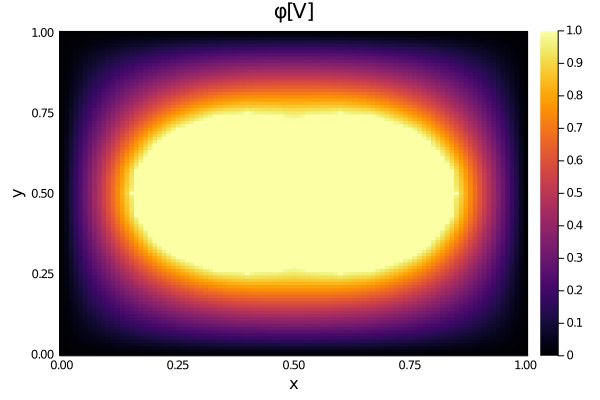

In [108]:
p1 = heatmap(x_2, y_2, phi)
plot!(p1,title="φ[V]",xlabel="x",ylabel="y")

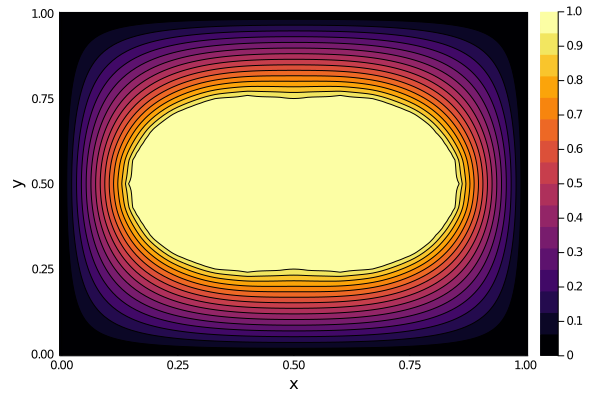

┌ Warning: Multiple series with different levels share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots C:\Users\x\.julia\packages\Plots\E3MWZ\src\backends\gr.jl:491


In [118]:
p2 = contourf!(x_2, y_2,phi)
plot!(p2,xlabel="x",ylabel="y")

<span style="color:blue">Dibuje las líneas de campo vectorial que se generan de obtener $-\nabla\phi$. (1 punto extra)<span>

Para sacar el campo eléctrico se define una función que regrese la gradiente

Serán dos funciones una para x y otra para y, ya que esta restringido a (xy)

In [131]:
function gradienteenx(x,y,phi)
     h=x[2]-x[1]
    gradiente=zeros(length(x),length(y))
    for i in 2:length(y)-1
        for j in 2:length(x)-1
            gradiente[i,j]=(phi[i,j+1]-phi[i,j-1])/h
        end
    end
    return gradiente
end
    

gradienteenx (generic function with 1 method)

In [132]:
function gradienteeny(x,y,phi)
    h=y[2]-y[1]
    gradiente=zeros(length(x),length(x))
    for i in 2:length(y)-1
        for j in 2:length(x)-1
            gradiente[i,j]=(phi[i+1,j]-phi[i-1,j])/h
        end
    end
    return gradiente
end

gradienteeny (generic function with 1 method)

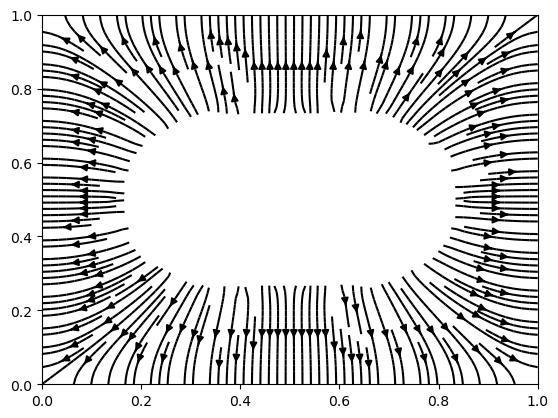

"Líneas de campo vectorial que se generan de obtener −∇𝜙"

In [211]:
Ex=-1 .*gradienteenx(x_2,y_2,phi) #−∇𝜙
Ey=-1 .*gradienteeny(x_2,y_2,phi) #−∇𝜙
streamplot(x_2,y_2,Ex,Ey,density=2,color="k")
"Líneas de campo vectorial que se generan de obtener −∇𝜙"

<span style="color:blue">2. Encuentre la solución a la ecuación de Fourier en 2D con condición a la frontera $\phi(0,y)=\phi(x,0)=\phi(1,y)=\phi(x,1)=0$ y con condición inicial $\phi(x,y,0)=0$ para todo los puntos afuera de los dos círculo de radio $1/4$ con centros en $(0.4,0.5)$ y $(0.6,0.5)$, y $\phi=1$ para todos los puntos dentro de los dos círculos anteriores. (3 puntos)<span>

<span style="color:blue">Puede suponer que el coeficiente de difusión es 1<span>

<span style="color:blue">Encuentre los estadoss estacionarios de la ecuación de onda en 2D para una membrana rectangular $L_{x}=\pi$, $L_{y}=2\pi$. Compare la solución numérica de los eigenvalores con la solución analítica. (3 puntos)<span>

<span style="color:blue">¿Qué sucedde con la solución si ahora $L_{x}=\pi$, $L_{y}=\sqrt{2\pi}$?<span>